In [2]:
import pandas as pd
from math import log2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#hz is the number
def equation_for_midi_number(hz):
    return 12*log2(hz/440) +69
    


# N is themidi number

def equation_for_hertz(n):
    return 440* 2**((n-69)/12)

def equation_for_harmonics(number_of_harmonics, midi_number):
    all_harmonics = []
    hertz = equation_for_hertz(midi_number)
    for i in range(number_of_harmonics):
        
        all_harmonics.append((i+1)*hertz)
    
    return all_harmonics
        

note_df = pd.DataFrame()


piano_range = range(21, 109)
piano_notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
piano_octave = [str(i) for i in range(0, 9)]

##populating dataframe columns
piano_note_index = 0
piano_octave_index = 0
for midi_number in piano_range:
    if piano_note_index %12 == 3:
        piano_octave_index += 1

    note_name = piano_notes[piano_note_index % 12] + piano_octave[piano_octave_index]
    note_df[note_name]= equation_for_harmonics(10,midi_number)
    
    piano_note_index += 1


note_df

    

,A0,A#0,B0,C1,C#1,D1,D#1,E1,F1,F#1,...,D#7,E7,F7,F#7,G7,G#7,A7,A#7,B7,C8
0,27.5,29.135235,30.867706,32.703196,34.647829,36.708096,38.890873,41.203445,43.653529,46.249303,...,2489.015870,2637.020455,2793.825851,2959.955382,3135.963488,3322.437581,3520.0,3729.310092,3951.06641,4186.009045
1,55.0,58.270470,61.735413,65.406391,69.295658,73.416192,77.781746,82.406889,87.307058,92.498606,...,4978.031740,5274.040911,5587.651703,5919.910763,6271.926976,6644.875161,7040.0,7458.620184,7902.13282,8372.018090
2,82.5,87.405705,92.603119,98.109587,103.943487,110.124288,116.672619,123.610334,130.960587,138.747909,...,7467.047609,7911.061366,8381.477554,8879.866145,9407.890464,9967.312742,10560.0,11187.930276,11853.19923,12558.027134
3,110.0,116.540940,123.470825,130.812783,138.591315,146.832384,155.563492,164.813778,174.614116,184.997211,...,9956.063479,10548.081821,11175.303406,11839.821527,12543.853951,13289.750323,14080.0,14917.240369,15804.26564,16744.036179
4,137.5,145.676175,154.338532,163.515978,173.239144,183.540480,194.454365,206.017223,218.267645,231.246514,...,12445.079349,13185.102277,13969.129257,14799.776908,15679.817439,16612.187903,17600.0,18646.550461,19755.33205,20930.045224
5,165.0,174.811411,185.206238,196.219174,207.886973,220.248576,233.345238,247.220668,261.921174,277.495817,...,14934.095219,15822.122732,16762.955109,17759.732290,18815.780927,19934.625484,21120.0,22375.860553,23706.39846,25116.054269
6,192.5,203.946646,216.073944,228.922370,242.534802,256.956672,272.236111,288.424112,305.574703,323.745120,...,17423.111088,18459.143187,19556.780960,20719.687672,21951.744415,23257.063064,24640.0,26105.170645,27657.46487,29302.063314
7,220.0,233.081881,246.941651,261.625565,277.182631,293.664768,311.126984,329.627557,349.228231,369.994423,...,19912.126958,21096.163642,22350.606812,23679.643054,25087.707903,26579.500645,28160.0,29834.480737,31608.53128,33488.072358
8,247.5,262.217116,277.809357,294.328761,311.830460,330.372864,350.017857,370.831002,392.881760,416.243726,...,22401.142828,23733.184098,25144.432663,26639.598435,28223.671391,29901.938226,31680.0,33563.790829,35559.59769,37674.081403
9,275.0,291.352351,308.677063,327.031957,346.478289,367.080960,388.908730,412.034446,436.535289,462.493028,...,24890.158698,26370.204553,27938.258515,29599.553817,31359.634879,33224.375806,35200.0,37293.100921,39510.66410,41860.090448


## DF solo con una fila, para usar solo fundamental frequency


In [3]:

# Assuming df is your dataframe
fundamental_df = note_df.drop(note_df.index[1:10])
fundamental_df.reset_index(drop=True, inplace=True)
fundamental_df

,A0,A#0,B0,C1,C#1,D1,D#1,E1,F1,F#1,...,D#7,E7,F7,F#7,G7,G#7,A7,A#7,B7,C8
0,27.5,29.135235,30.867706,32.703196,34.647829,36.708096,38.890873,41.203445,43.653529,46.249303,...,2489.01587,2637.020455,2793.825851,2959.955382,3135.963488,3322.437581,3520.0,3729.310092,3951.06641,4186.009045


## first section for stationary harmony, 
usan algo que se llama T_sub, esto significa el common subharmonic, o realmente T_sub es el periodo aproximado de la onda compuesta de varias notas. Es una combinación lineal de las diferentes frecuencias, pero para calcularlo, es un papelón. Ya que hay una fórmula particulat

La fórmula, T_sub = avg(k_i*t_i)
esta k_i es un integer multiplier al periodo de cada onda que se necesita para poder decir llegué. Proof read y leer fisica para esto, sin embargo, un ejemplo. 

para el periodo1 = 7.6ms y periodo2= 6.1ms, son las ondas C3 y E3. 
Estas ondas cuando están juntas, la primera da oscilaciones son estas.  

In [4]:


def calculate_period_dataframe(note_names:list,note_df ,max=13):
    df = pd.DataFrame()
    for note_name in note_names:
        df[note_name]= 1/note_df[note_name][0]

    ## calculating period
    for i in range(1,max):
        list_of_periods = []
        for note_name in note_names:
            list_of_periods.append((1/(note_df[note_name][0]))*i)

        df.loc[i] = list_of_periods
    # note_period_c3 = (1/note_c3[0]) * (i)
    # note_period_e3 = (1/note_e3[0]) * (i)
    # note_period_g3 = (1/note_g3[0]) * (i)
    # note_period_c4 = (1/note_c4[0]) * (i)
    # dataframe_demos.loc[i] = [note_period_c3, note_period_e3, note_period_g3, note_period_c4]


    
    return df

note_names = ['C3', 'D#3', 'G3', 'A#3']
period_df = calculate_period_dataframe(note_names, fundamental_df)  
period_df



,C3,D#3,G3,A#3
1,0.007645,0.006428,0.005102,0.004290
2,0.015289,0.012856,0.010204,0.008581
3,0.022934,0.019285,0.015306,0.012871
4,0.030578,0.025713,0.020408,0.017161
5,0.038223,0.032141,0.025511,0.021452
6,0.045867,0.038569,0.030613,0.025742
7,0.053512,0.044998,0.035715,0.030032
8,0.061156,0.051426,0.040817,0.034323
9,0.068801,0.057854,0.045919,0.038613
10,0.076445,0.064282,0.051021,0.042903


### Entonces el problema es..
T_sub = k_i* t_i, entonces que k_i es el que tengo que usar para que k_i *t_i su diferencia sea minima con k_j * t_j para j!=i
mira lo loco entre g3 y c4

In [5]:
notes = ['B3', 'D4', 'F#4', 'A4']
calculate_period_dataframe(notes, fundamental_df)

,B3,D4,F#4,A4
1,0.004050,0.003405,0.002703,0.002273
2,0.008099,0.006810,0.005405,0.004545
3,0.012149,0.010216,0.008108,0.006818
4,0.016198,0.013621,0.010811,0.009091
5,0.020248,0.017026,0.013514,0.011364
6,0.024297,0.020431,0.016216,0.013636
7,0.028347,0.023837,0.018919,0.015909
8,0.032396,0.027242,0.021622,0.018182
9,0.036446,0.030647,0.024325,0.020455
10,0.040495,0.034052,0.027027,0.022727


Vi algo loco con los ratios... 
chequea

In [6]:
def ratios_dataframe(notes, note_df):
    df = pd.DataFrame()
    for note_index in range(len(notes)-1):
        frequency_ratio = note_df[notes[note_index+1]][0]/note_df[notes[note_index]][0]
        df[notes[note_index] + ' to ' + notes[note_index+1]] = frequency_ratio

    for i in range(1,16):
        list_of_ratios = []
        for note_index in range(len(notes)-1):
            frequency_ratio = note_df[notes[note_index+1]][0]/note_df[notes[note_index]][0]
            list_of_ratios.append(frequency_ratio*i)
        df.loc[i] = list_of_ratios
    return df

notes = ['B3', 'D4', 'F#4', 'A4']
ratios_df = ratios_dataframe(notes, fundamental_df)
ratios_df
        

,B3 to D4,D4 to F#4,F#4 to A4
1,1.189207,1.259921,1.189207
2,2.378414,2.519842,2.378414
3,3.567621,3.779763,3.567621
4,4.756828,5.039684,4.756828
5,5.946036,6.299605,5.946036
6,7.135243,7.559526,7.135243
7,8.324450,8.819447,8.324450
8,9.513657,10.079368,9.513657
9,10.702864,11.339289,10.702864
10,11.892071,12.599210,11.892071


In [7]:
notes=['C2','C3','E3','G3','C4']
ratios_df = ratios_dataframe(notes, fundamental_df)
period_df = calculate_period_dataframe(notes, fundamental_df)
ratios_df, period_df

(    C2 to C3   C3 to E3   E3 to G3   G3 to C4
 1        2.0   1.259921   1.189207   1.334840
 2        4.0   2.519842   2.378414   2.669680
 3        6.0   3.779763   3.567621   4.004520
 4        8.0   5.039684   4.756828   5.339359
 5       10.0   6.299605   5.946036   6.674199
 6       12.0   7.559526   7.135243   8.009039
 7       14.0   8.819447   8.324450   9.343879
 8       16.0  10.079368   9.513657  10.678719
 9       18.0  11.339289  10.702864  12.013559
 10      20.0  12.599210  11.892071  13.348399
 11      22.0  13.859132  13.081278  14.683238
 12      24.0  15.119053  14.270485  16.018078
 13      26.0  16.378974  15.459692  17.352918
 14      28.0  17.638895  16.648900  18.687758
 15      30.0  18.898816  17.838107  20.022598,
           C2        C3        E3        G3        C4
 1   0.015289  0.007645  0.006067  0.005102  0.003822
 2   0.030578  0.015289  0.012135  0.010204  0.007645
 3   0.045867  0.022934  0.018202  0.015306  0.011467
 4   0.061156  0.030578  0.0242

Prueba matematica que si onda A tiene menos ciclos por segundo que onda B entonces para k_i * A = K_j * B, k_i < k_j

Si onda A recorre más distancia con menos ciclos, para que B recorra la misma distancia que A, necesita más ciclos. 

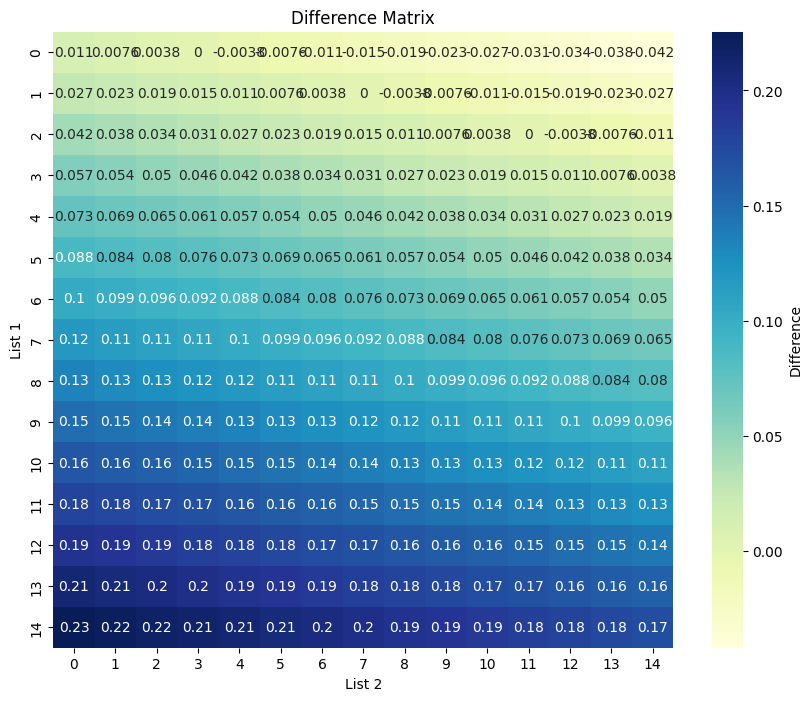

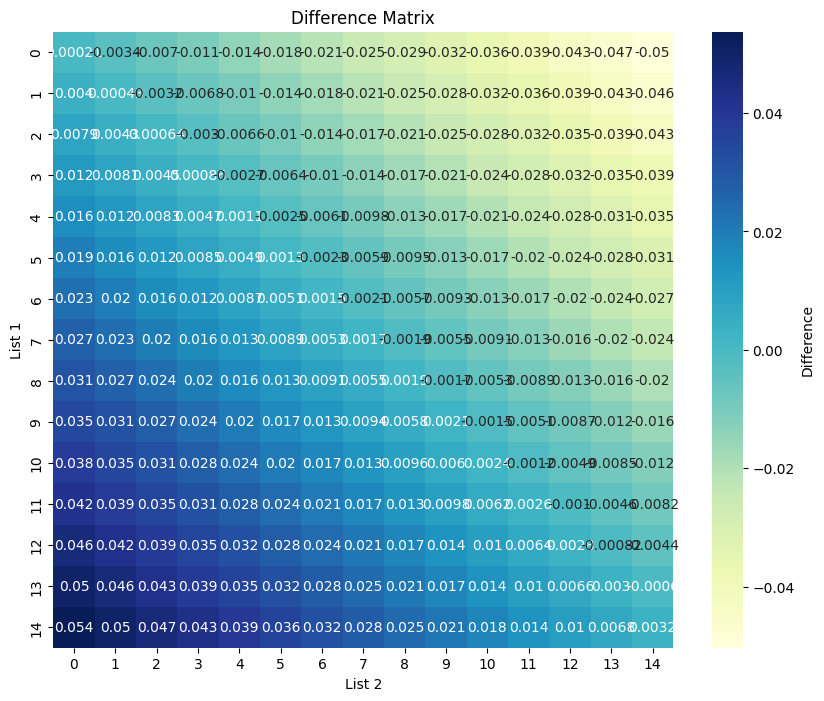

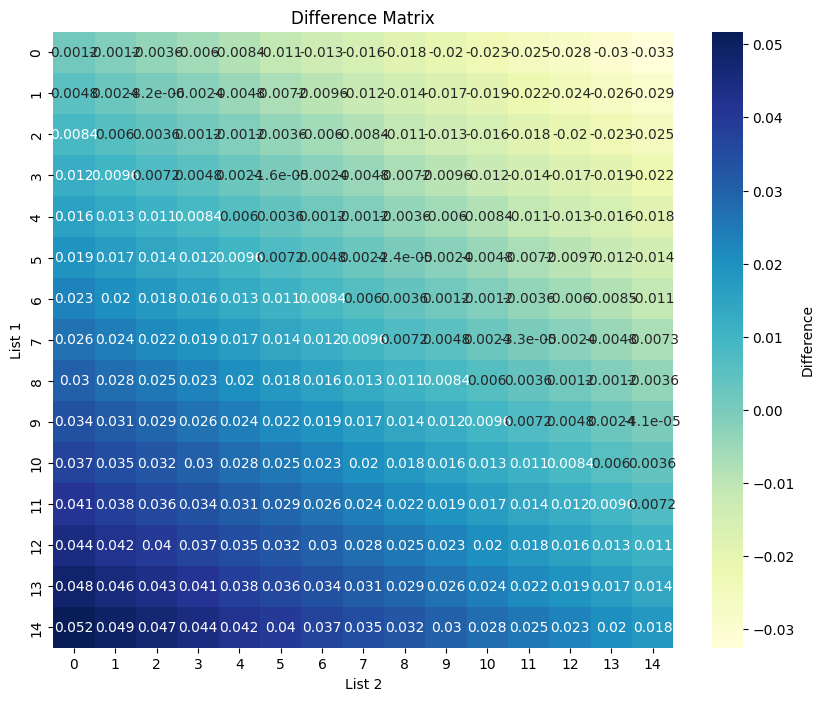

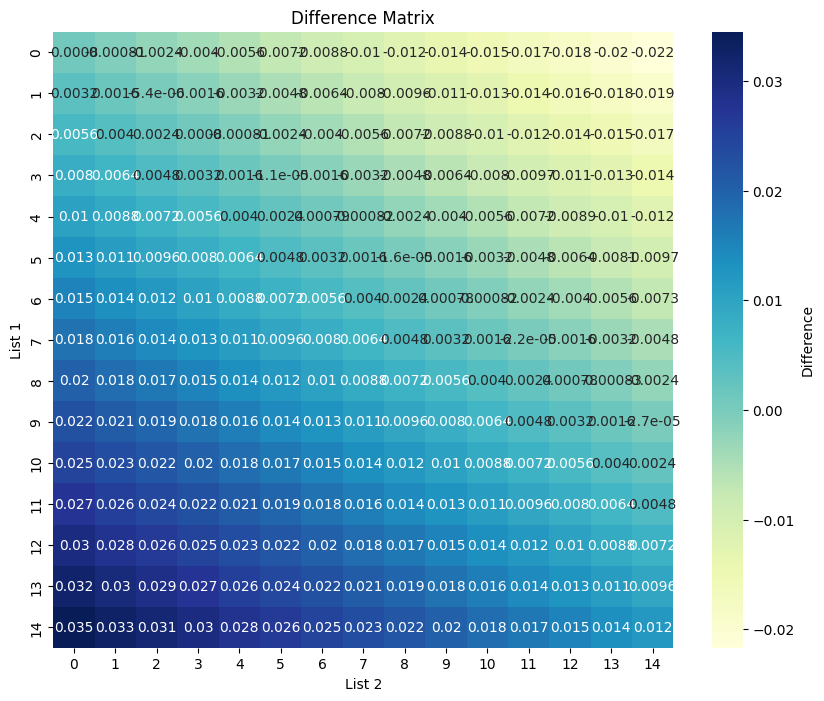

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_difference_matrix(list1, list2):
    diff_matrix = np.zeros((len(list1), len(list2)))
    for i in range(len(list1)):
        for j in range(len(list2)):
            diff_matrix[i, j] = list1[i] - list2[j]
    return diff_matrix

def plot_difference_matrix(diff_matrix, note_name1, note_name2):
    df = pd.DataFrame(diff_matrix)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Difference'})
    plt.xlabel('List 2')
    plt.ylabel('List 1')
    plt.title('Difference Matrix')
    plt.savefig('images/difference_matrix'+note_name1+'_'+note_name2+'.png')


note_names= ['C2','C4', 'C#4', 'G#4' , 'D#5']
list_of_periods = calculate_period_dataframe(note_names, fundamental_df,max=16).values.T
for note_ind in range(len(note_names)-1):
    note_name_1 = note_names[note_ind]
    note_name_1_list = list_of_periods[note_ind]
    note_name_2 = note_names[note_ind+1]
    note_name_2_list = list_of_periods[note_ind+1]
    difference_matrix = create_difference_matrix(note_name_1_list, note_name_2_list)

    # note_name2 = note_names[note_ind+1]
    
    # list2 = calculate_period_dataframe([note_name2], fundamental_df,max=16).values.T
    difference_matrix = create_difference_matrix(note_name_1_list, note_name_2_list)
    plot_difference_matrix(difference_matrix,note_name1=note_name_1, note_name2=note_name_2)


In [9]:
import sys
!{sys.executable} -m pip install altair



## Graficaré a ver...

In [10]:
import altair as alt

note_names = ['C3', 'D#3', 'G3', 'A#3']
period_df = calculate_period_dataframe(note_names, fundamental_df)  


## changing period_df to long_format
period_df_long = period_df.reset_index().melt(id_vars='index')
period_df_long.columns = ['multiple', 'note', 'period']



chart = alt.Chart(period_df_long).mark_bar(
    opacity=0.5
).encode(
    x=alt.X('period', title='Period', scale=alt.Scale(domain=(0,0.1))),
    y=alt.Y('multiple', title='Multiple', scale=alt.Scale()),
    color=alt.Color('note', title='Note'),

)
chart

alt.Chart(...)

### Intentar de restar todos con todos, ver patrones. 

In [11]:
## vamos a restar hz con hz
note_names = ['C3', 'D#3', 'G3', 'A#3']

def create_hz_dataframe(note_names, note_df):
    df = pd.DataFrame()
    for note_name in note_names:
        df[note_name]= note_df[note_name][0]

    ## calculating period
    for i in range(1,16):
        list_of_hz = []
        for note_name in note_names:
            list_of_hz.append(note_df[note_name][0]*i)

        df.loc[i] = list_of_hz
    return df

hz_df = create_hz_dataframe(note_names, fundamental_df)
hz_df




,C3,D#3,G3,A#3
1,130.812783,155.563492,195.997718,233.081881
2,261.625565,311.126984,391.995436,466.163762
3,392.438348,466.690476,587.993154,699.245642
4,523.251131,622.253967,783.990872,932.327523
5,654.063913,777.817459,979.988590,1165.409404
6,784.876696,933.380951,1175.986308,1398.491285
7,915.689479,1088.944443,1371.984026,1631.573165
8,1046.502261,1244.507935,1567.981744,1864.655046
9,1177.315044,1400.071427,1763.979462,2097.736927
10,1308.127827,1555.634919,1959.977180,2330.818808


In [12]:
from pprint import pprint
## finding minimums of i and j in hz_df

def find_minimums(df,type='hz'):

    #this df will contain subtracts that are less than a semitone of difference

    dif_df = pd.DataFrame()
    notes = df.columns
    all_differences = []
    for note_ind in range(len(notes)-1):
        note_1 = notes[note_ind]
        note_2 = notes[(note_ind+1)]
        diff_dict ={
            'note_1': note_1,
        
            'note_1_'+type: df[note_1][1],

            'note_2': note_2,
            'note_2_'+type: df[note_2][1],
            'differences': []
        }

        for i in range(1,16):
            # print('i:', i,'ith cycle of first note')
            for j in range(1,16):
                # print('j:', j,'jth cycle of second note')
                if type == 'hz':
                    difference = df[note_1][i] - df[note_2][j]
                elif type == 'period':
                    hz1  = 1/df[note_1][i]
                    hz2 = 1/df[note_2][j]
                    difference = hz1 - hz2
                # difference = df[note_1][i] - df[note_2][j]
                
                insert_difference_i_j = {
                    'i': i,
                    'j': j,
                    'difference_abs': abs(difference),
                    'difference': difference
                }
                diff_dict['differences'].append(insert_difference_i_j)

        all_differences.append(diff_dict)
    

    ## sort each element in all differences, by difference abs

    for diff_dict in all_differences:
        diff_dict['differences'] = sorted(diff_dict['differences'], key=lambda x: x['difference_abs'])

    # global_minimums = find_global_minimums(all_differences)

    return all_differences #,global_minimums

def filter_top_n(all_differences, n):
    for diff_dict in all_differences:
        diff_dict['differences'] = diff_dict['differences'][:n]
    return all_differences

def find_global_minimums(all_differences):

    ## compare, for each entry in all differences
    ## take the two notes

    for difference_properties in all_differences:
        note_1 = difference_properties['note_1']
        note_2 = difference_properties['note_2']

        ## when note_1 is i, note_2 is j, which

    pass
        
all_differences = find_minimums(hz_df)



pprint(filter_top_n(all_differences,5))

[{'differences': [{'difference': 7.059236596593564,
                   'difference_abs': 7.059236596593564,
                   'i': 6,
                   'j': 5},
                  {'difference': -10.632236017554078,
                   'difference_abs': 10.632236017554078,
                   'i': 13,
                   'j': 11},
                  {'difference': 14.118473193187128,
                   'difference_abs': 14.118473193187128,
                   'i': 12,
                   'j': 10},
                  {'difference': -17.691472614147642,
                   'difference_abs': 17.691472614147642,
                   'i': 7,
                   'j': 6},
                  {'difference': -24.75070921074115,
                   'difference_abs': 24.75070921074115,
                   'i': 1,
                   'j': 1}],
  'note_1': 'C3',
  'note_1_hz': 130.8127826502993,
  'note_2': 'D#3',
  'note_2_hz': 155.56349186104046},
 {'differences': [{'difference': -6.173412658296229,
           

In [13]:
## lets compare with periods
note_names = ['B3', 'F#4', 'B4', 'D5']
period_df = calculate_period_dataframe(note_names, fundamental_df, max=16)
all_differences = find_minimums(period_df, type='period')
pprint(filter_top_n(all_differences,5))

[{'differences': [{'difference': 0.02787021536391876,
                   'difference_abs': 0.02787021536391876,
                   'i': 10,
                   'j': 15},
                  {'difference': 0.0348377692048949,
                   'difference_abs': 0.0348377692048949,
                   'i': 8,
                   'j': 12},
                  {'difference': 0.046450358939857495,
                   'difference_abs': 0.046450358939857495,
                   'i': 6,
                   'j': 9},
                  {'difference': 0.0696755384097898,
                   'difference_abs': 0.0696755384097898,
                   'i': 4,
                   'j': 6},
                  {'difference': 0.1393510768195796,
                   'difference_abs': 0.1393510768195796,
                   'i': 2,
                   'j': 3}],
  'note_1': 'B3',
  'note_1_period': 0.004049539627910633,
  'note_2': 'F#4',
  'note_2_period': 0.0027027434431880024},
 {'differences': [{'difference': -0.04645035

In [14]:
import numpy as np


def create_note_difference_matrix(period_df):
    notes = period_df.columns
    ranges = []
    values = [] 
    shape = []
    for note in notes:
        # ranges.append(note)
        values.append(period_df[note].values)
        shape.append(len(period_df[note].values))
    matrix = np.zeros(shape)
    
    
    ## works for for arrays only
    array1 = values[0]
    array2 = values[1]
    array3 = values[2]
    array4 = values[3]
    for i in range(len(array1)):
        for j in range(len(array2)):
            for k in range(len(array3)):
                for l in range(len(array4)):
                    ## find maximum difference between the four notes at each i,j,k,l
                    min_num = min(array1[i], array2[j], array3[k], array4[l])
                    max_num = max(array1[i], array2[j], array3[k], array4[l])

                    matrix[i,j,k,l] = max_num - min_num




    
    return matrix
           


In [27]:
def create_note_std_mean_matrix(period_df):
    notes = period_df.columns
    ranges = []
    values = [] 
    shape = []
    for note in notes:
        # ranges.append(note)
        values.append(period_df[note].values)
        shape.append(len(period_df[note].values))
    matrix_std = np.full(shape,np.inf)
    matrix_mean = np.full(shape,np.inf)
    
    ## works for for arrays only
    array1 = values[0]
    array2 = values[1]
    array3 = values[2]
    array4 = values[3]
    for i in range(1,len(array1)):
        for j in range(1,len(array2)):
            for k in range(1,len(array3)):
                for l in range(1,len(array4)):
                    matrix_std[i,j,k,l] = np.std([array1[i], array2[j], array3[k], array4[l]])
                    matrix_mean[i,j,k,l] = np.mean([array1[i], array2[j], array3[k], array4[l]])
    return matrix_std, matrix_mean
                

                    


  
           


In [28]:

matrix = create_note_difference_matrix(period_df)
matrix.shape
mean_matrix, std_matrix = create_note_std_mean_matrix(period_df)

In [29]:

def get_smallest_values(matrix, N):
    flat_indices = np.argsort(np.abs(matrix).ravel())[:N]
    min_indices = [np.unravel_index(idx, matrix.shape) for idx in flat_indices]
    return min_indices



In [31]:


N = 5  # Number of smallest values to find

min_indices = get_smallest_values(matrix, N)
for i, idx in enumerate(min_indices):
    print(f"#{i+1}: Value {matrix[idx]} at position {idx}")
    print(f'Stanard deviation {std_matrix[idx]} at position {idx}')
    print(f'Mean value {mean_matrix[idx]} at position {idx}')

# print('\nstandard deviation\n')
# min_indices = get_smallest_values(std_matrix, N)
# for i, idx in enumerate(min_indices):
#     print(f"#{i+1}: Value {std_matrix[idx]} at position {idx}")
#     print(f"Mean value {mean_matrix[idx]} at position {idx}")




#1: Value 0.0004140291355235158 at position (1, 2, 3, 4)
Stanard deviation 0.008204874308137829 at position (1, 2, 3, 4)
Mean value 0.00017799824074575608 at position (1, 2, 3, 4)
#2: Value 0.0004879874929266323 at position (5, 8, 11, 13)
Stanard deviation 0.02418896750484625 at position (5, 8, 11, 13)
Mean value 0.00020368830090084937 at position (5, 8, 11, 13)
#3: Value 0.0008280582710470316 at position (3, 5, 7, 9)
Stanard deviation 0.016409748616275657 at position (3, 5, 7, 9)
Mean value 0.00035599648149151216 at position (3, 5, 7, 9)
#4: Value 0.0008928655547074081 at position (3, 5, 7, 8)
Stanard deviation 0.015984093196708418 at position (3, 5, 7, 8)
Mean value 0.0003814119444979546 at position (3, 5, 7, 8)
#5: Value 0.0012420874065705474 at position (5, 8, 11, 14)
Stanard deviation 0.02461462292441349 at position (5, 8, 11, 14)
Mean value 0.0005339947222372685 at position (5, 8, 11, 14)


In [39]:
### que tal si nomralizamos valores
def create_note_std_mean_matrix_normalized(period_df):
    notes = period_df.columns
    ranges = []
    values = [] 
    shape = []
    for note in notes:
        # ranges.append(note)
        values.append(period_df[note].values)
        shape.append(len(period_df[note].values))
    matrix_std = np.full(shape,np.inf)
    matrix_mean = np.full(shape,np.inf)
    difference_matrix = np.full(shape,np.inf)
    
    ## works for for arrays only
    array1 = values[0]
    array2 = values[1]
    array3 = values[2]
    array4 = values[3]
    for i in range(0,len(array1)):
        for j in range(0,len(array2)):
            for k in range(0,len(array3)):
                for l in range(0,len(array4)):

                    min_val = min(array1[i], array2[j], array3[k], array4[l])
                    max_val = max(array1[i], array2[j], array3[k], array4[l])

                    norm_array = [(array1[i]-min_val)/(max_val-min_val), (array2[j]-min_val)/(max_val-min_val), (array3[k]-min_val)/(max_val-min_val), (array4[l]-min_val)/(max_val-min_val)]
                    matrix_std[i,j,k,l] = np.std(norm_array)
                    matrix_mean[i,j,k,l] = np.mean([array1[i], array2[j], array3[k], array4[l]])

                    difference_matrix[i,j,k,l] = max_val - min_val
    return matrix_std, matrix_mean, difference_matrix



                

In [71]:
N = 5  # Number of smallest values to find
note_names = ['A3', 'A4', 'C#5', 'E5']
period_df = calculate_period_dataframe(note_names, fundamental_df, max=16)
matrix_std, matrix_mean, difference_matrix = create_note_std_mean_matrix_normalized(period_df)
min_indices = get_smallest_values(difference_matrix, N)
for i, idx in enumerate(min_indices):
    print(f"#{i+1}: Value {difference_matrix[idx]} at position {idx}")
    print(f'Stanard deviation {matrix_std[idx]} at position {idx}')
    print(f'Mean value {matrix_mean[idx]} at position {idx}')
# min_indices = get_smallest_values(matrix, N)
# for i, idx in enumerate(min_indices):
#     print(f"#{i+1}: Value {matrix[idx]} at position {idx}")
#     print(f'Stanard deviation {std_matrix[idx]} at position {idx}')
#     print(f'Mean value {mean_matrix[idx]} at position {idx}')


#1: Value 8.185666497637252e-05 at position (1, 3, 4, 5)
Stanard deviation 0.40008185052829764 at position (1, 3, 4, 5)
Mean value 0.009075580791153752 at position (1, 3, 4, 5)
#2: Value 0.00016371332995274504 at position (3, 7, 9, 11)
Stanard deviation 0.40008185052829764 at position (3, 7, 9, 11)
Mean value 0.018151161582307503 at position (3, 7, 9, 11)
#3: Value 0.0007229700858938579 at position (4, 9, 12, 14)
Stanard deviation 0.4281315808007751 at position (4, 9, 12, 14)
Mean value 0.022914435081857136 at position (4, 9, 12, 14)
#4: Value 0.0007945550178927244 at position (2, 5, 7, 8)
Stanard deviation 0.43028661410110197 at position (2, 5, 7, 8)
Mean value 0.013838854290703383 at position (2, 5, 7, 8)
#5: Value 0.00086613994989159 at position (0, 1, 2, 2)
Stanard deviation 0.4321636172771723 at position (0, 1, 2, 2)
Mean value 0.004763273499549631 at position (0, 1, 2, 2)


### tal vez no es prioridad, pero para tener multiples notas a la vez

In [56]:


def increment_index(amount_of_notes, range_considered):
    """ 
    amount_of_notes: array of indexes, whose length is equal of notes played
    range_considered: int of maximum, range to consider index
    """ 
    index_to_increment = len(amount_of_notes) - 1
    incrementing = 1
    loops = 0
    while incrementing and index_to_increment>=0:
        amount_of_notes[index_to_increment]+=1
        loops += 1
            # print('loops:', loops)
        if amount_of_notes[index_to_increment] >= range_considered:
            amount_of_notes[index_to_increment] = 0
            index_to_increment -= 1
        else:
            incrementing = 0

    return amount_of_notes, index_to_increment, loops

amount_of_notes = [0,0,0,0]
range_considered = 15
index_to_increment = len(amount_of_notes) - 1

while index_to_increment >= 0:
    amount_of_notes, index_to_increment, loops = increment_index(amount_of_notes, range_considered)
    print(amount_of_notes, index_to_increment, loops)






[0, 0, 0, 1] 3 1
[0, 0, 0, 2] 3 1
[0, 0, 0, 3] 3 1
[0, 0, 0, 4] 3 1
[0, 0, 0, 5] 3 1
[0, 0, 0, 6] 3 1
[0, 0, 0, 7] 3 1
[0, 0, 0, 8] 3 1
[0, 0, 0, 9] 3 1
[0, 0, 0, 10] 3 1
[0, 0, 0, 11] 3 1
[0, 0, 0, 12] 3 1
[0, 0, 0, 13] 3 1
[0, 0, 0, 14] 3 1
[0, 0, 1, 0] 2 2
[0, 0, 1, 1] 3 1
[0, 0, 1, 2] 3 1
[0, 0, 1, 3] 3 1
[0, 0, 1, 4] 3 1
[0, 0, 1, 5] 3 1
[0, 0, 1, 6] 3 1
[0, 0, 1, 7] 3 1
[0, 0, 1, 8] 3 1
[0, 0, 1, 9] 3 1
[0, 0, 1, 10] 3 1
[0, 0, 1, 11] 3 1
[0, 0, 1, 12] 3 1
[0, 0, 1, 13] 3 1
[0, 0, 1, 14] 3 1
[0, 0, 2, 0] 2 2
[0, 0, 2, 1] 3 1
[0, 0, 2, 2] 3 1
[0, 0, 2, 3] 3 1
[0, 0, 2, 4] 3 1
[0, 0, 2, 5] 3 1
[0, 0, 2, 6] 3 1
[0, 0, 2, 7] 3 1
[0, 0, 2, 8] 3 1
[0, 0, 2, 9] 3 1
[0, 0, 2, 10] 3 1
[0, 0, 2, 11] 3 1
[0, 0, 2, 12] 3 1
[0, 0, 2, 13] 3 1
[0, 0, 2, 14] 3 1
[0, 0, 3, 0] 2 2
[0, 0, 3, 1] 3 1
[0, 0, 3, 2] 3 1
[0, 0, 3, 3] 3 1
[0, 0, 3, 4] 3 1
[0, 0, 3, 5] 3 1
[0, 0, 3, 6] 3 1
[0, 0, 3, 7] 3 1
[0, 0, 3, 8] 3 1
[0, 0, 3, 9] 3 1
[0, 0, 3, 10] 3 1
[0, 0, 3, 11] 3 1
[0, 0, 3, 12] 3 1
[0, 0, 3, 13]

In [52]:
len(period_df.values.T.flatten())


60

### Entonces ahora, necesito hacer loop. 

In [74]:
def calculating_means_std_delta_t(period_df):
    notes = period_df.columns
    range_to_consider = len(period_df[notes[0]].values)
    print( 'range_considered',range_considered)
    flattened_values = period_df.values.T.flatten()
    indices_to_check = [0] * len(notes)
    smallest_standard_deviation = np.inf
    indices = []
    smallest_indices = []
    standard_deviations = []
    means =[]
    differences = [] 
    index_to_increment = len(indices_to_check) - 1
    indices.append(indices_to_check)
    while index_to_increment >= 0:

        values_to_check = []
        for i in range(len(indices_to_check)):
            values_to_check.append(flattened_values[(i*range_to_consider)+indices_to_check[i]])
        max_val = max(values_to_check)
        min_val = min(values_to_check)
        differences.append(max_val - min_val)

        normalize_values = [(val-min_val)/(max_val-min_val) for val in values_to_check]
        temp_std = np.std(normalize_values)
        temp_mean = np.mean(values_to_check)
        # if temp_std< smallest_standard_deviation:
        #     smallest_standard_deviation = temp_std
        #     smallest_indices = indices_to_check
        standard_deviations.append(temp_std)
        means.append(temp_mean)
        

        indices_to_check, index_to_increment,_ = increment_index(indices_to_check, range_to_consider)
        indices.append(indices_to_check.copy())

    return indices,standard_deviations, means, differences



def find_n_minimums(differences,n):
    ## going to create dictionary where keys are the differences and values are the indices
    diff_dict = {}
    for i in range(len(differences)):
        if differences[i] not in diff_dict:
            diff_dict[differences[i]] = []
        diff_dict[differences[i]].append(i)

    ## going to sort the keys
    sorted_keys = sorted(diff_dict.keys())
    min_indices = []
    for key in sorted_keys[:n]:
        min_indices += diff_dict[key]
    return min_indices

note_names = ['C3', 'E3', 'G3', 'C4']
period_df = calculate_period_dataframe(note_names, fundamental_df, max=16)
period_df

,C3,E3,G3,C4
1,0.007645,0.006067,0.005102,0.003822
2,0.015289,0.012135,0.010204,0.007645
3,0.022934,0.018202,0.015306,0.011467
4,0.030578,0.024270,0.020408,0.015289
5,0.038223,0.030337,0.025511,0.019111
6,0.045867,0.036405,0.030613,0.022934
7,0.053512,0.042472,0.035715,0.026756
8,0.061156,0.048540,0.040817,0.030578
9,0.068801,0.054607,0.045919,0.034400
10,0.076445,0.060675,0.051021,0.038223


In [ ]:

indices,standard_deviations, means, differences = calculating_means_std_delta_t(period_df)
# print('indices:', indices)
min_indices = find_n_minimums(differences,5)
for i in min_indices:
    print(f'index {indices[i]} with standard deviation {standard_deviations[i]} and mean {means[i]} and difference {differences[i]}')


In [60]:

smallest_indices, indices, standard_deviations, means = finding_smallest_delta_t(period_df)
print(smallest_indices)
min(standard_deviations)


range_considered 15
[0, 0, 0, 0]


0.3535534177551747

### remark, consonancia es delta_t pequeño con T_sub pequeño, disonancia es delta_t t_sub

In [51]:
## visualize the matrix using altair
# import altair as alt

for i in min_indices:
    print(i)

def get_period_min_indices(period_df, min_indices):
    min_df = pd.DataFrame()
    

    ##initializing dataframe
    for i in range(len(min_indices)):
        list_of_values = []
        for note in range(len(period_df.columns)):

            # print(min_indices[i])
            note_name = period_df.columns[note]
            entry_of_note_name = period_df[note_name][min_indices[i][note]+1]
            list_of_values.append(entry_of_note_name)
        min_df[i] = list_of_values
    

    return min_df
min_df = get_period_min_indices(period_df, min_indices).T
min_df

(1, 3, 4, 5)
(3, 7, 9, 11)
(4, 9, 12, 14)
(2, 5, 7, 8)
(0, 1, 2, 2)


,0,1,2,3
0,0.009091,0.009091,0.009019,0.009101
1,0.018182,0.018182,0.018039,0.018202
2,0.022727,0.022727,0.023450,0.022753
3,0.013636,0.013636,0.014431,0.013652
4,0.004545,0.004545,0.005412,0.004551


In [45]:
melted = pd.melt(min_df, value_vars=min_df.columns, var_name='note', value_name='period')

melted['y_axis'] = [1]*len(melted)
melted


,note,period,y_axis
0,0,0.027242,1
1,0,0.034052,1
2,0,0.006810,1
3,0,0.020431,1
4,0,0.047673,1
5,1,0.027027,1
6,1,0.032433,1
7,1,0.005405,1
8,1,0.021622,1
9,1,0.048649,1


In [40]:
chart = alt.Chart(melted).mark_bar(
    opacity=0.7
).encode(
    x=alt.X('period', title='Period'),
    y=alt.Y('y_axis', title='', scale=alt.Scale(domain=(0,1))),
    color='note:N',

)


In [41]:
chart

alt.Chart(...)